In [8]:
import sqlite3

db_name = "sales_data.db"

# Connect to database
conn = sqlite3.connect(db_name)
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sample_data = [
    ('Apple', 10, 1.5),
    ('Banana', 5, 0.8),
    ('Apple', 7, 1.5),
    ('Orange', 8, 1.2),
    ('Banana', 10, 0.8),
    ('Orange', 5, 1.2),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()


In [9]:
import sqlite3
import pandas as pd

# Connect to the DB
conn = sqlite3.connect(db_name)

# Define SQL query
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

# Load query result into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()


In [10]:
print("Sales Summary:")
print(df)

Sales Summary:
  product  total_qty  revenue
0   Apple         34     51.0
1  Banana         30     24.0
2  Orange         26     31.2


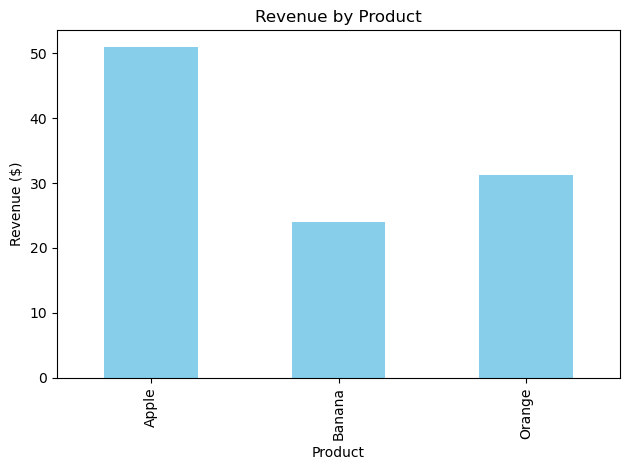

In [11]:
import matplotlib.pyplot as plt

# Plot bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()


In [13]:
from IPython.display import FileLink
import os

if os.path.exists(db_name):
    display(FileLink(db_name, result_html_prefix="👉 Click to download your database file: "))
else:
    print("Database file not found.")

C:\Users\nikit\sales_data.db